# DATA 434 Data Visualization Winter 2024
## Lab 6: Crafting Plots
#### Introduction:
The purpose of this lab is to learn to control all the formatting an attributes of the charts you create. To do this without needing to make design choices of your own, you will recreate the five charts used as case studies in chapter 6 of *Stroytelling with data*. The data you will need as well as an example of each chart is available in an [Excel file](https://github.com/adamribaudo/storytelling-with-data-ggplot/raw/master/data/original%20data/CHAPTER_6_VISUALS.xlsx). Please refer to the text for complete details on each figure or checkout the Excel versions.

Code is included to import the data into pandas dataframes for each figure. Feel free to delete if you want to import it in a different format.

#### Instructions:
1. Download the data into the same directory this notebook is located.
2. Run the first code to the data frames.
3. Recreate **three** figures from the text. Copy as many of the details as you can.
4. This [github repo](https://github.com/empathy87/storytelling-with-data) as applicable examples based on matplotlib. Scroll down the base screen for helpful color info.
4. Checkout this [example](https://github.com/empathy87/storytelling-with-data/blob/master/vertical-bar/figure-6-4.ipynb) from the same repo for a solution to Figure 4 to get started. Note that this example uses matplotlib rather than plotly, so you will need to adapt.
7. Do as much as you can for each figure, but do not worry if you have not captured all of the details. It is more valuable for you to  at least some of each figure than it is to completely finish one or two figures.

8. **Number your figures to correspond to how they appear in the text.** 

9. Submit your complete notebook.

In [2]:
#header code to get you started
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
f1data = pd.read_excel("CHAPTER_6_VISUALS.xlsx",sheet_name=0,header=0,usecols='C:E',skiprows=4,nrows=31)
f2data = pd.read_excel("CHAPTER_6_VISUALS.xlsx",sheet_name=1,header=0,usecols='C:G',skiprows=4,nrows=13)
f3data = pd.read_excel("CHAPTER_6_VISUALS.xlsx",sheet_name=2,header=0,usecols='C:H',skiprows=5,nrows=11)
f4data = pd.read_excel("CHAPTER_6_VISUALS.xlsx",sheet_name=3,header=0,usecols='C:I',skiprows=4,nrows=6)
f5data = pd.read_excel("CHAPTER_6_VISUALS.xlsx",sheet_name=4,header=0,usecols='C:G',skiprows=4,nrows=15)
f1data.head()

,Days since launch,Last year,Progress to date
0,0,0,0.0
1,1,3867,4962.0
2,2,5736,8163.0
3,3,8352,12746.0
4,4,10784,15736.0


In [12]:
import pandas as pd
import plotly.graph_objects as go
%matplotlib inline

# Import data
f1data = pd.read_excel("CHAPTER_6_VISUALS.xlsx", sheet_name=0, header=0, usecols='C:E', skiprows=4, nrows=31)

# Rename columns
f1data = f1data.rename(columns={'Days since launch': 'Launch'})
f1data = f1data.rename(columns={'Last year': 'LastYear'})
f1data = f1data.rename(columns={'Progress to date': 'Progress'})

# Create a Figure object
fig1 = go.Figure()

# Add traces to the figure
fig1.add_trace(go.Scatter(x=f1data.Launch, y=f1data.LastYear, line=dict(color='#94B2D7'), name='Last year'))
fig1.add_trace(go.Scatter(x=f1data.Launch, y=f1data.Progress, line=dict(color='#4A81BF', width=5), name='Progress'))

# Add a horizontal line at y=50,000 (GOAL)
fig1.add_shape(
    type='line',
    x0=f1data.Launch.min(),
    x1=f1data.Launch.max(),
    y0=50000,
    y1=50000,
    line=dict(color='red', dash='dash'),
    name='Goal'
)

# Add annotation for the GOAL label
fig1.add_annotation(
    x=f1data.Launch.median(),  # x-coordinate for the label
    y=50000,  # y-coordinate for the label
    text='GOAL',
    showarrow=False,
    font=dict(color='red', size=12)
)

# Add annotations for labels and markers
last_year_label = go.layout.Annotation(
    x=f1data.Launch.iloc[-1],
    y=f1data.LastYear.iloc[-1],
    text='Last year $51,400',
    showarrow=True,
    arrowhead=7,
    ax=0,
    ay=-40
)

progress_label = go.layout.Annotation(
    x=f1data.Launch.iloc[-1],
    y=f1data.Progress.iloc[-1],
    text='Progress to date $33,967',
    showarrow=True,
    arrowhead=7,
    ax=0,
    ay=-40
)

# Add bold dots at the end of the lines
last_year_marker = go.layout.Annotation(
    x=f1data.Launch.iloc[-1],
    y=f1data.LastYear.iloc[-1],
    text='',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-10
)

progress_marker = go.layout.Annotation(
    x=f1data.Launch.iloc[-1],
    y=f1data.Progress.iloc[-1],
    text='',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-10
)

# Update layout
fig1.update_layout(
    title='Annual giving campaign progress',
    yaxis_title='Money raised',
    xaxis_title='Days since campaign launch',
    plot_bgcolor='white',
    showlegend=True,
    xaxis=dict(
        showline=True,
        linecolor='rgb(204, 204, 204)',
        ticks='outside',
    ),
    yaxis=dict(
        showline=True,
        linecolor='rgb(204, 204, 204)',
        ticks='outside',
    ),
    annotations=[last_year_label, progress_label, last_year_marker, progress_marker]
)


In [50]:
# Importing necessary libraries
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# Importing data
f1data = pd.read_excel("CHAPTER_6_VISUALS.xlsx", sheet_name=0, header=0, usecols='C:E', skiprows=4, nrows=31)
f2data = pd.read_excel("CHAPTER_6_VISUALS.xlsx", sheet_name=1, header=0, usecols='C:G', skiprows=4, nrows=13)
f3data = pd.read_excel("CHAPTER_6_VISUALS.xlsx", sheet_name=2, header=0, usecols='C:H', skiprows=5, nrows=11)
f4data = pd.read_excel("CHAPTER_6_VISUALS.xlsx", sheet_name=3, header=0, usecols='C:I', skiprows=4, nrows=6)
f5data = pd.read_excel("CHAPTER_6_VISUALS.xlsx", sheet_name=4, header=0, usecols='C:G', skiprows=4, nrows=15)

# Create Figure2
fig2 = go.Figure()

f2data = f2data.rename(columns={'Unnamed: 3': 'Years'})

# Figure2
fig2.add_trace(go.Scatter(x=f2data.Years, y=f2data.Sales,
                          line=dict(color='#4A81BF', dash='dot')))
fig2.add_trace(go.Scatter(x=f2data.Years[:9], y=f2data.Sales[:9],
                          line=dict(color='#4A81BF', width=5)))
fig2.update_xaxes(showticklabels=True,
                  tickvals=[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
fig2.update_yaxes(range=[0, 180])
fig2.update_layout(
    title='Sales over time',
    yaxis_title='Sales ($Billion)',
    xaxis_title='ACTUAL                                                FORECAST',
    plot_bgcolor='white',
    showlegend=False,
    xaxis=dict(
        showline=True,
        linecolor='rgb(204, 204, 204)',
        ticks='outside',
    ),
    yaxis=dict(
        showline=True,
        linecolor='rgb(204, 204, 204)',
        ticks='outside',
    ),
)

# Annotations
annotations = [
    dict(
        x='2007',
        y=70,  
        xref="x",
        yref="y",
        text="2006-09:annual <br>sales growth of 7-8%",
        showarrow=True,
        arrowhead=4,
        ax=0,
        ay=-40,
    ),
    dict(
        x='2010',
        y=80,  
        xref="x",
        yref="y",
        text="2010:more increase<br> 22% sales<br> year over<br> year,driven by a, b, and c",
        showarrow=True,
        arrowhead=4,
        ax=0,
        ay=-40,
    ),
    dict(
        x='2012',
        y=110,  
        xref="x",
        yref="y",
        text="2011-14:another<br> period of steady <br>growth of 8-9% annually",
        showarrow=True,
        arrowhead=4,
        ax=0,
        ay=-40,
    ),
    dict(
        x='2015',
        y=120,  
        xref="x",
        yref="y",
        text="2015 & beyond:<br>10% year over <br>year increase in sales*",
        showarrow=True,
        arrowhead=4,
        ax=0,
        ay=-40,
    ),
]

fig2.update_layout(annotations=annotations)


In [71]:
import pandas as pd
import plotly.express as px

# Importing data
f1data = pd.read_excel("CHAPTER_6_VISUALS.xlsx", sheet_name=0, header=0, usecols='C:E', skiprows=4, nrows=31)
f2data = pd.read_excel("CHAPTER_6_VISUALS.xlsx", sheet_name=1, header=0, usecols='C:G', skiprows=4, nrows=13)
f3data = pd.read_excel("CHAPTER_6_VISUALS.xlsx", sheet_name=2, header=0, usecols='C:H', skiprows=5, nrows=11)
f4data = pd.read_excel("CHAPTER_6_VISUALS.xlsx", sheet_name=3, header=0, usecols='C:I', skiprows=4, nrows=6)
f5data = pd.read_excel("CHAPTER_6_VISUALS.xlsx", sheet_name=4, header=0, usecols='C:G', skiprows=4, nrows=15)

# List of DataFrames
dataframes = [f1data, f2data, f3data, f4data, f5data]

# Create stacked bar charts
for i, data in enumerate(dataframes):
    fig = px.bar(data,
                 x=data.columns[0],
                 y=data.columns[1:],
                 barmode="stack",
                 labels={"value": "Percentage"},
                 title=f"Goal attainment over time - Sheet {i+1}",
                 height=400,
                 width=800,
                )
    
    fig.update_layout(
        xaxis_title=data.columns[0],
        yaxis_title="Percentage fractions of total projects",
        yaxis=dict(tickformat="%"),  # Display y-axis as percentage
        showlegend=True,
    )

    fig.show()


ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [52]:
# Your code to create the fig3


In [6]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline
#%matplotlib
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'


In [7]:
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
# # directors by year
X = ['Today\n9/30/15', 'FY16', 'FY17', 'FY18', 'FY19', 'FY20']
YA = np.array([0, -28, -44, -62, -77, -99]) # attrition
YT = np.array([190, 162, 146, 128, 113, 91]) # today
YP = np.array([0, 7, 10, 14, 16, 22]) # promoted
YQ = np.array([0, 4, 4, 4, 4, 4]) # acquisition
YU = np.array([0, 28, 50, 68, 91, 112]) # unmet gap

Text(-1.45, 280, 'Expected director population over time')

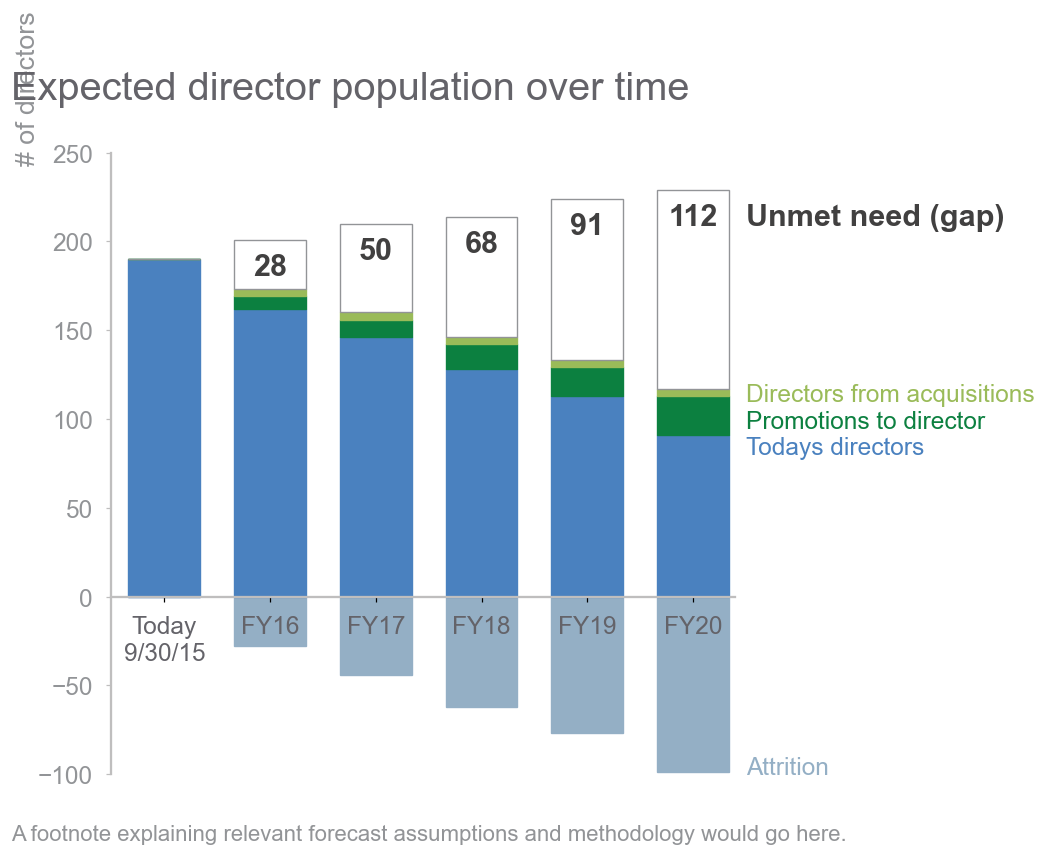

In [8]:
# create new figure
fig, ax1 = plt.subplots(figsize=(9.5, 7.2),  # width, height in inches
                        dpi=110)  # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.103, right=0.7, top=0.881, bottom=0.096)

# set the data limits for the y,x-axis
ax1.set_ylim([-100, 250])
ax1.set_xlim([-0.5, 5.4])
# move x axes to zero
ax1.spines['bottom'].set_position('zero')

plt.bar(list(range(0, 6)), YA, width=0.68, color=BLUE4, 
        edgecolor=BLUE4, linewidth=0.9)
plt.bar(list(range(0, 6)), YT, width=0.68, color=BLUE2, 
        edgecolor=BLUE2, linewidth=0.9)
plt.bar(list(range(0, 6)), YP, width=0.68, bottom=YT, color=GREEN1, 
        edgecolor=GREEN1, linewidth=0.9)
plt.bar(list(range(0, 6)), YQ, width=0.68, bottom=YT + YP, color=GREEN2, 
        edgecolor=GREEN2, linewidth=0.9)
white_bars = plt.bar(list(range(0, 6)), YU, width=0.68, bottom=YT + YP + YQ, 
                     color='white', edgecolor=GRAY7, linewidth=0.9)

# add numerical data labels for bars
for i, b in enumerate(white_bars):
    if YU[i] == 0:
        continue
    x = b.get_x() + b.get_width() / 2  # x-center of bar
    y = b.get_y() + b.get_height() - 20  # y-top of bar
    ax1.text(x, y,
             str(YU[i]),
             fontsize=20,
             fontweight='bold',
             horizontalalignment='center',
             color=GRAY2)

# add text for numerical data labels
ax1.text(5.5, y, 'Unmet need (gap)', fontsize=20, fontweight='bold', 
         color=GRAY2)

# add text labeling other bars
ax1.text(5.5, 110, 'Directors from acquisitions', fontsize=16, color=GREEN2)
ax1.text(5.5, 95, 'Promotions to director', fontsize=16, color=GREEN1)
ax1.text(5.5, 80, 'Today''s directors', fontsize=16, color=BLUE2)
ax1.text(5.5, -100, 'Attrition', fontsize=16, color=BLUE4)

# set properties for axes object (ticks for all issues with labels)
plt.setp(ax1, xticks=list(range(0, 6)), xticklabels=X)

# remove chart border
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color(GRAY9)
ax1.spines['left'].set_color(GRAY9)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

# change y ticks color
ax1.tick_params(axis='y', colors=GRAY9)
# hide x ticks
ax1.tick_params(bottom='off')

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY4)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY7)
    # use trasformations to shift y tick labels slightly left
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# title the axis
ax1.text(-1.4, 246, '# of directors', fontsize=17.5, rotation='vertical', 
         color=GRAY7)

# add footnote with the data source
plt.text(-1.45, -137,
         'A footnote explaining relevant forecast assumptions'
         ' and methodology would go here.',
         fontsize=14.5, color=GRAY7)

# title the plot
plt.text(-1.45, 280, 'Expected director population over time', 
         fontsize=26, color=GRAY4)